# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
output_data_file

'output_data/cities.csv'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

In [4]:
cities

['hermanus',
 'iqaluit',
 'ewa beach',
 'gotsu',
 'cape town',
 'svetlaya',
 'mackay',
 'punta arenas',
 'meulaboh',
 'cidreira',
 'praia da vitoria',
 'rikitea',
 'qaanaaq',
 'storsteinnes',
 'new norfolk',
 'bourges',
 'dikson',
 'kiunga',
 'nakamura',
 'albany',
 'atuona',
 'maldonado',
 'raudeberg',
 'comodoro rivadavia',
 'callaway',
 'cabo san lucas',
 'cockburn town',
 'grindavik',
 'ciales',
 'ukiah',
 'hithadhoo',
 'samarai',
 'ushuaia',
 'lompoc',
 'alofi',
 'barentsburg',
 'alyangula',
 'yellowknife',
 'glyadyanskoye',
 'sahuaripa',
 'necochea',
 'jamestown',
 'upernavik',
 'saint-joseph',
 'jahrom',
 'matsubase',
 'sawtell',
 'mataura',
 'olga',
 'kapaa',
 'vaini',
 'guerrero negro',
 'nova olimpia',
 'tuatapere',
 'grand river south east',
 'severo-kurilsk',
 'castro',
 'mahebourg',
 'leon',
 'saint-louis',
 'chokurdakh',
 'coahuayana',
 'mehamn',
 'arraial do cabo',
 'conde',
 'broome',
 'amahai',
 'puerto escondido',
 'saskylakh',
 'haines junction',
 'rocha',
 'busselto

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# base_url to be used -> http://api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}
# create empty lists of info to be extracted from api call
long = []
lats = []
temps = []
humidity = []
clouds = []
winds = []
max_temp = []
min_temp = []
Cities = []

cnt = 0

print("Beginning Data Retrieval")
print("--------------------------")

# create iteration that goes thru cities and uses api call
for city in cities:
    try:    
        base_url = "http://api.openweathermap.org/data/2.5/weather?"
        target_url = base_url + "q=" + city + "&appid=" + api_key + "&units=imperial"
        target_url = requests.get(target_url).json()
        cnt +=1

        long.append(target_url["coord"]["lon"])
        lats.append(target_url["coord"]["lat"])
        temps.append(target_url["main"]["temp"])
        min_temp.append(target_url["main"]["temp_min"])
        max_temp.append(target_url["main"]["temp_max"])
        humidity.append(target_url["main"]["humidity"])
        clouds.append(target_url["clouds"]["all"])
        winds.append(target_url["wind"]["speed"])
        Cities.append(city.title())
        
        print(f'Processing Record #{cnt} for {city}')
                
    except:
        print(f'{city} not found. Skipping...')
        
print("--------------------------")
print("End of Data Retrieval")
print("--------------------------")

Beginning Data Retrieval
--------------------------
Processing Record #1 for hermanus
Processing Record #2 for iqaluit
Processing Record #3 for ewa beach
Processing Record #4 for gotsu
Processing Record #5 for cape town
Processing Record #6 for svetlaya
Processing Record #7 for mackay
Processing Record #8 for punta arenas
Processing Record #9 for meulaboh
Processing Record #10 for cidreira
Processing Record #11 for praia da vitoria
Processing Record #12 for rikitea
Processing Record #13 for qaanaaq
Processing Record #14 for storsteinnes
Processing Record #15 for new norfolk
Processing Record #16 for bourges
Processing Record #17 for dikson
Processing Record #18 for kiunga
Processing Record #19 for nakamura
Processing Record #20 for albany
Processing Record #21 for atuona
Processing Record #22 for maldonado
Processing Record #23 for raudeberg
Processing Record #24 for comodoro rivadavia
Processing Record #25 for callaway
Processing Record #26 for cabo san lucas
Processing Record #27 for

Processing Record #229 for katete
Processing Record #230 for williston
Processing Record #231 for oosterhout
Processing Record #232 for lebu
Processing Record #233 for moche
Processing Record #234 for naze
Processing Record #235 for saldanha
Processing Record #236 for houma
Processing Record #237 for kropotkin
Processing Record #238 for poitiers
Processing Record #239 for aleksandrov gay
Processing Record #240 for alihe
Processing Record #241 for mazagao
Processing Record #242 for tuktoyaktuk
Processing Record #243 for carnarvon
Processing Record #244 for palu
Processing Record #245 for gat
Processing Record #246 for mbandaka
we not found. Skipping...
Processing Record #248 for sevenoaks
Processing Record #249 for bontang
samalaeulu not found. Skipping...
Processing Record #251 for karauli
Processing Record #252 for torrelodones
Processing Record #253 for kenora
Processing Record #254 for ancud
marcona not found. Skipping...
Processing Record #256 for flinders
Processing Record #257 fo

Processing Record #460 for san policarpo
Processing Record #461 for half moon bay
Processing Record #462 for owando
Processing Record #463 for mountain home
Processing Record #464 for gold coast
khormuj not found. Skipping...
kazalinsk not found. Skipping...
Processing Record #467 for zlobin
Processing Record #468 for troitskoye
Processing Record #469 for juneau
Processing Record #470 for zhenlai
Processing Record #471 for ati
Processing Record #472 for rundu
Processing Record #473 for shache
Processing Record #474 for shenjiamen
Processing Record #475 for namatanai
Processing Record #476 for hambantota
Processing Record #477 for kuryk
Processing Record #478 for broken hill
Processing Record #479 for dingle
Processing Record #480 for kyakhta
Processing Record #481 for krasnoselkup
Processing Record #482 for pyay
Processing Record #483 for mikun
Processing Record #484 for marquette
Processing Record #485 for nishihara
Processing Record #486 for tyulgan
Processing Record #487 for labuhan

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
city_df = pd.DataFrame({"City": Cities,
                        "Longitude": long,
                        "Latitude": lats,
                        "Tempurature(F)": temps,
                        "Humidity": humidity,
                        "Wind Speed": winds,
                        "Cloudiness": clouds,
                        "Max Temp(F)": max_temp,
                        "Min Temp(F)": min_temp
                                              })

city_df.to_csv("city_data.csv", encoding="utf-8", index=False)
city_df

,City,Longitude,Latitude,Tempurature(F),Humidity,Wind Speed,Cloudiness,Max Temp(F),Min Temp(F)
0,Hermanus,19.23,-34.42,57.54,81,3.00,84,57.99,57.00
1,Iqaluit,-68.51,63.75,6.40,84,4.70,75,6.80,6.01
2,Ewa Beach,-158.01,21.32,81.68,45,6.93,1,84.20,77.00
3,Gotsu,132.22,35.00,57.20,82,10.29,75,57.20,57.20
4,Cape Town,18.42,-33.93,54.14,81,2.24,55,57.00,50.00
5,Svetlaya,138.33,46.54,44.74,61,14.03,82,44.74,44.74
6,Mackay,149.20,-21.15,86.85,70,11.41,12,88.00,86.00
7,Punta Arenas,-70.92,-53.15,44.29,75,10.29,14,44.60,44.01
8,Meulaboh,96.13,4.14,83.88,71,3.13,97,83.88,83.88
9,Cidreira,-50.21,-30.18,64.29,87,2.15,4,64.29,64.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

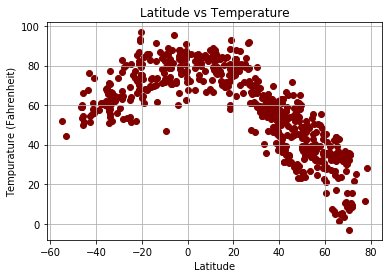

In [35]:
x_axis = city_df["Latitude"]
y_axis = city_df["Tempurature(F)"]
plt.scatter(x_axis, y_axis, c="maroon")
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Tempurature (Fahrenheit)")
plt.grid()
plt.savefig("Weather_images/Fig.1.png")

#### Latitude vs. Humidity Plot

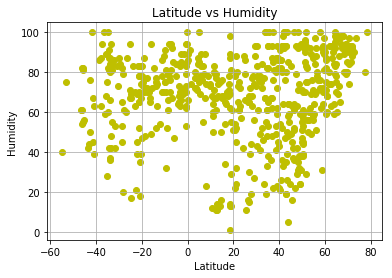

In [37]:
x_axis = city_df["Latitude"]
y_axis = city_df["Humidity"]
plt.scatter(x_axis, y_axis, c="y")
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("Weather_images/Fig2.png")

#### Latitude vs. Cloudiness Plot

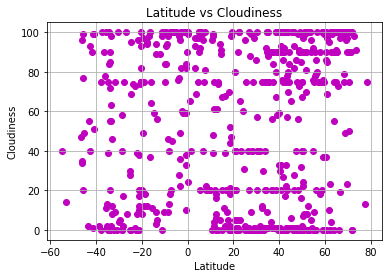

In [33]:
x_axis = city_df["Latitude"]
y_axis = city_df["Cloudiness"]
plt.scatter(x_axis, y_axis, c="m")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("Weather_images/Fig3.png")

#### Latitude vs. Wind Speed Plot

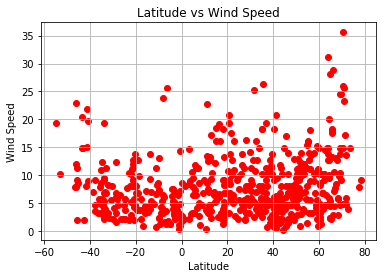

In [40]:
x_axis = city_df["Latitude"]
y_axis = city_df["Wind Speed"]
plt.scatter(x_axis, y_axis, c="r")
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("Weather_images/Fig4.png")